In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w):
    return tf.matmul(X, w)

# The same model as linear regression, we will use 
# an available cost function which performs 
# softmax and cross entropy
mnist= input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, = mnist.train.images, 
trY = mnist.train.labels
teX = mnist.test.images
teY = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
w = init_weights([784, 10])
py_x = model(X, w)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=Y))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x, 1)

In [7]:
# X = tf.placeholder("float", [None, 784]) # create symbolic variables
# Y = tf.placeholder("float", [None, 10])

# w = init_weights([784, 10]) # like in linear regression, we need a shared variable weight matrix for logistic regression

# py_x = model(X, w)

# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=Y)) # compute mean cross entropy (softmax is applied internally)
# train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct optimizer
# predict_op = tf.argmax(py_x, 1) # at predict time, evaluate the argmax of the logistic regression

iteration: 0  | accuracy:  0.8844
iteration: 10  | accuracy:  0.9161
iteration: 20  | accuracy:  0.9196
iteration: 30  | accuracy:  0.9216
iteration: 40  | accuracy:  0.9224
iteration: 50  | accuracy:  0.922
iteration: 60  | accuracy:  0.9226
iteration: 70  | accuracy:  0.9235
iteration: 80  | accuracy:  0.9237
iteration: 90  | accuracy:  0.9236


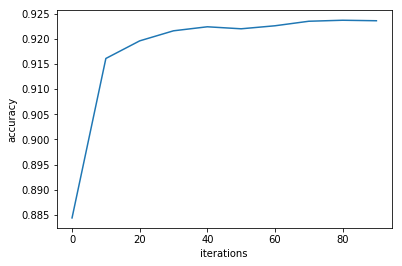

In [60]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    accuracy_over_time = []
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX) + 1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        if i % 10 == 0:
            accuracy = np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX}))
            accuracy_over_time.append((i, accuracy))
            print('iteration:', i,' | accuracy: ', accuracy)
            # take the equality between the correct answer * and 
            # the prediction (same operation with argmax), which will is read
            # as 0 (False) or 1 (True), and average that to get the accuracy
            # * (np.argmax, axis=1 will yield, for each of the 10k arrays 
            # in teY, the index where there is a 1 instead of 0 (one hot), 
            # and therefore what is the number in the mnist image)    
    plt.ylabel('accuracy')
    plt.xlabel('iterations')
    plt.plot(*zip(*accuracy_over_time))

In [9]:
# # Launch the graph in a session
# with tf.Session() as sess:
#     # you need to initialize all variables
#     tf.global_variables_initializer().run()

#     for i in range(100):
#         for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
#             sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
#         if i % 10 == 0:
#             print(i, np.mean(np.argmax(teY, axis=1) ==
#                              sess.run(predict_op, feed_dict={X: teX})))

0 0.8836
10 0.916
20 0.9198
30 0.9209
40 0.9215
50 0.922
60 0.9231
70 0.9236
80 0.9234
90 0.9236
